https://arxiv.org/pdf/2101.05922v1.pdf

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
bw_image = cv2.imread("examples/Unequalized_Hawkes_Bay_NZ.jpg", cv2.IMREAD_GRAYSCALE)

In [16]:
def plot_image(image, size=(15, 15)):
    if image is None:
        return
    plt.close() # just in case one is open
    plt.figure(figsize=size)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.tick_params(left=False,
                    right=False,
                    labelleft=False,
                    labelbottom=False,
                    bottom=False)
    plt.show()
    plt.close()

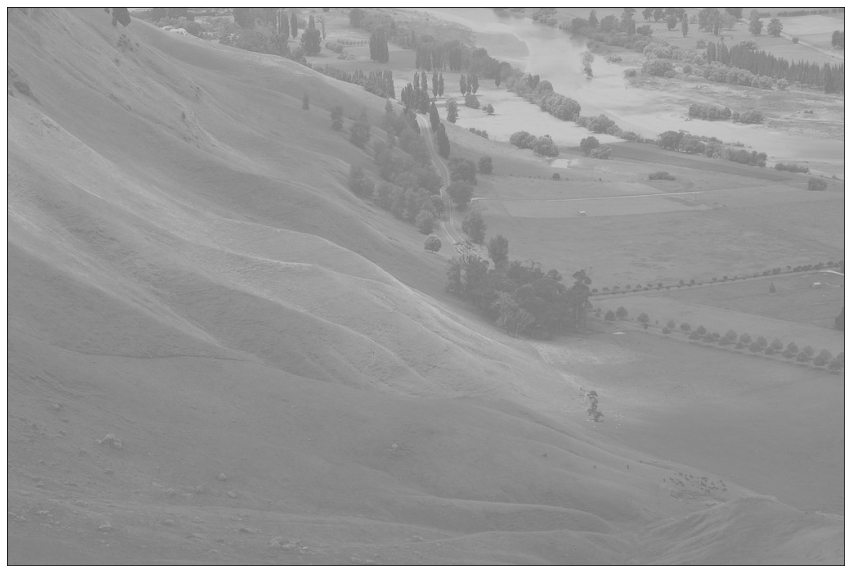

In [17]:
plot_image(bw_image)

In [18]:
inclusion_mask = None
if inclusion_mask is not None:
    plt.imshow(inclusion_mask)

In [19]:
if inclusion_mask is not None:
    intensities, counts = np.unique(bw_image[inclusion_mask], return_counts=True)
    g_a, g_d = np.mean(bw_image[inclusion_mask]), np.std(bw_image[inclusion_mask])
else:
    intensities, counts = np.unique(bw_image, return_counts=True)
    g_a, g_d = np.mean(bw_image), np.std(bw_image)

print(intensities, counts)

print("g_a: ", g_a)
print("g_D: ", g_d, '\n')
print(g_d/g_a)

L = len(intensities)
T_float = L * g_d / g_a
T = int(round(T_float))
print("L, T: ", L, T_float, '\n')

#------If we use T as the mean intensity
# cum_counts = np.cumsum(counts)
# print(np.argwhere(cum_counts<cum_counts[-1]/2.))
# T =int(np.argwhere(cum_counts<cum_counts[-1]/2.)[-1])
# T_float = T
# #-------------------------------------

N_left = counts[0: T].sum()
N_right = counts[T: L].sum()
print("N_left, N_right: ", N_left, N_right, '\n')

T_l_cumsum = np.cumsum(counts[0: T])
T_l = np.arange(0, T)[T_l_cumsum <= N_left / 2.0][-1] + 1
print("T_l: ", T_l, '\n')

T_u_cumsum = np.cumsum(counts[T: L])
T_u = np.arange(T, L)[T_u_cumsum <= N_right / 2.0][-1] + 1
print("T_u: ", T_u, '\n')

N_L1 = np.sum(counts[0: T_l])
N_L2 = np.sum(counts[T_l: T])
N_U1 = np.sum(counts[T: T_u])
N_U2 = np.sum(counts[T_u: L])
print("N_L1, N_L2, N_U1, N_U2")
print(N_L1, N_L2, N_U1, N_U2, '\n')

Tm_L1 = np.median(counts[0: T_l])
Tm_L2 = np.median(counts[T_l: T])
Tm_U1 = np.median(counts[T: T_u])
Tm_U2 = np.median(counts[T_u: L])
print("Tm_L1, Tm_L2, Tm_U1, Tm_U2")
print(Tm_L1, Tm_L2, Tm_U1, Tm_U2, '\n')

Ta_L1 = counts[0: T_l].sum() / (T_l * 1.0)
Ta_L2 = counts[T_l: T].sum() / ((T_float - T_l)) * 1.0
Ta_U1 = counts[T: T_u].sum() / ((T_u - T_float)) * 1.0
Ta_U2 = counts[T_u: L].sum() / ((L - T_u)) * 1.0
print("Ta_L1, Ta_L2, Ta_U1, Ta_U2")
print(Ta_L1, Ta_L2, Ta_U1, Ta_U2, '\n')

T_L1 = Tm_L1 if Tm_L1 >= 0 else Ta_L1
T_L2 = Tm_L2 if Tm_L2 >= 0 else Ta_L2
T_U1 = Tm_U1 if Tm_U1 >= 0 else Ta_U1
T_U2 = Tm_U2 if Tm_U2 >= 0 else Ta_U2
print("T_L1, T_L2, T_U1, T_U2")
print(T_L1, T_L2, T_U1, T_U2, '\n')

hN_L1 = counts[0: T_l].copy()
hN_L2 = counts[T_l: T].copy()
hN_U1 = counts[T: T_u].copy()
hN_U2 = counts[T_u: L].copy()

hN_L1 = np.clip(hN_L1, 0, T_L1)
hN_L2 = np.clip(hN_L2, 0, T_L2)
hN_U1 = np.clip(hN_U1, 0, T_U1)
hN_U2 = np.clip(hN_U2, 0, T_U2)
print("hN_L1, hN_L2, hN_U1, hN_U2")
print(hN_L1, hN_L2, hN_U1, hN_U2, '\n')

P_L1 = hN_L1 / (1.0*sum(hN_L1))
P_L2 = hN_L2 / (1.0*sum(hN_L2))
P_U1 = hN_U1 / (1.0*sum(hN_U1))
P_U2 = hN_U2 / (1.0*sum(hN_U2))
print("P_L1, P_L2, P_U1, P_U2")
print(P_L1.sum(), P_L2.sum(), P_U1.sum(), P_U2.sum(), '\n')

C_L1 = np.cumsum(P_L1)
C_L2 = np.cumsum(P_L2)
C_U1 = np.cumsum(P_U1)
C_U2 = np.cumsum(P_U2)
print("C_L1.max(), C_L2.max(), C_U1.max(), C_U2.max()")
print(C_L1.max(), C_L2.max(), C_U1.max(), C_U2.max())

f_1 = T_l * (C_L1 - 0.5 * P_L1)
f_2 = (T_float - T_l) * (C_L2 - 0.5 * P_L2) + T_l
f_3 = (T_u - T_float) * (C_U1 - 0.5 * P_U1) + T_float
f_4 = (L - T_u) * (C_U2 - 0.5 * P_U2) + T_u

print("f_1, f_2, f_3, f_4")
print(np.concatenate((f_1, f_2, f_3, f_4)))

[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208] [    1     1    12    19    49    93   220   488  1061  1747  2160  2718
  3259  4039  5108  6395  8463 10610 13530 16115 19125 22186 25696 28701
 28324 25759 24369 23578 21775 20385 19839 19781 19445 18856 18457 17906
 17917 17806 18485 17680 15799 14163 12812 11576 10751  9899  9380  8863
  8399  7404  6403  5911  5591  5150  4610  4320  3860  3616  3430  3063
  2649  2213  2046  1859  1692  1484  1362  1290  1153  1232  1300  1520
  1384  1527  1735  1851  1532  1359  1414  1483  1541  1595  2369  2810
  1143   420   128    56    41    18    10    10     6     1     1]
g_a:  147.99458672675695
g_D:  14.

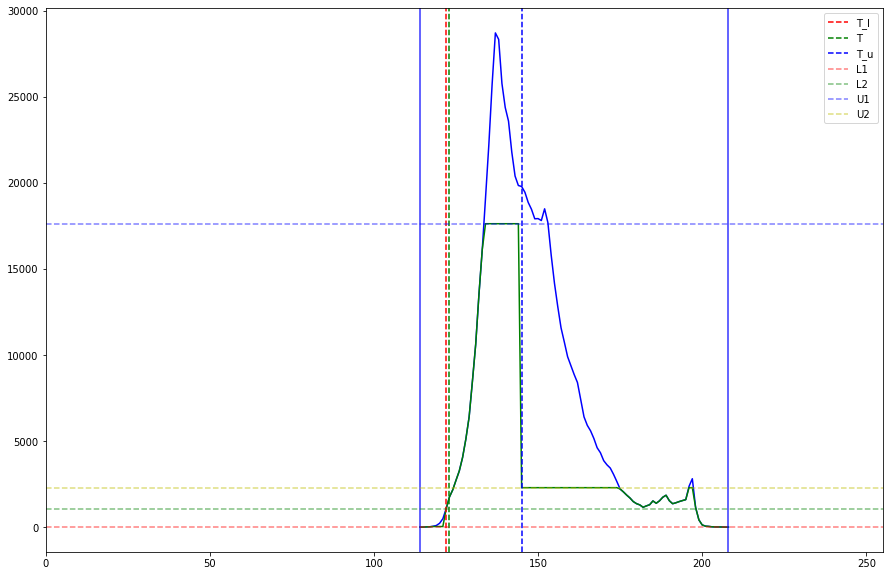

In [20]:
fig = plt.figure(figsize=(15, 10))
plt.plot(intensities, counts, c='b')
plt.plot(intensities, np.concatenate((hN_L1, hN_L2, hN_U1, hN_U2)), 'g')
plt.xlim(0, 255)

plt.axvline(intensities[T_l], c='red', linestyle='--', label='T_l')
plt.axvline(intensities[T], c='green', linestyle='--', label='T')
plt.axvline(intensities[T_u], c='blue', linestyle='--', label='T_u')

plt.axvline(intensities[0], linestyle='-', alpha=0.8, c='blue')
plt.axvline(intensities[L-1], linestyle='-', alpha=0.8, c='blue')

plt.axhline(y=T_L1, color='r', linestyle='--', alpha=0.5, label='L1')
plt.axhline(y=T_L2, color='g', linestyle='--', alpha=0.5, label='L2')
plt.axhline(y=T_U1, color='b', linestyle='--', alpha=0.5, label='U1')
plt.axhline(y=T_U2, color='y', linestyle='--', alpha=0.5, label='U2')

plt.legend()

208 114
255 0
(95,) (95,)


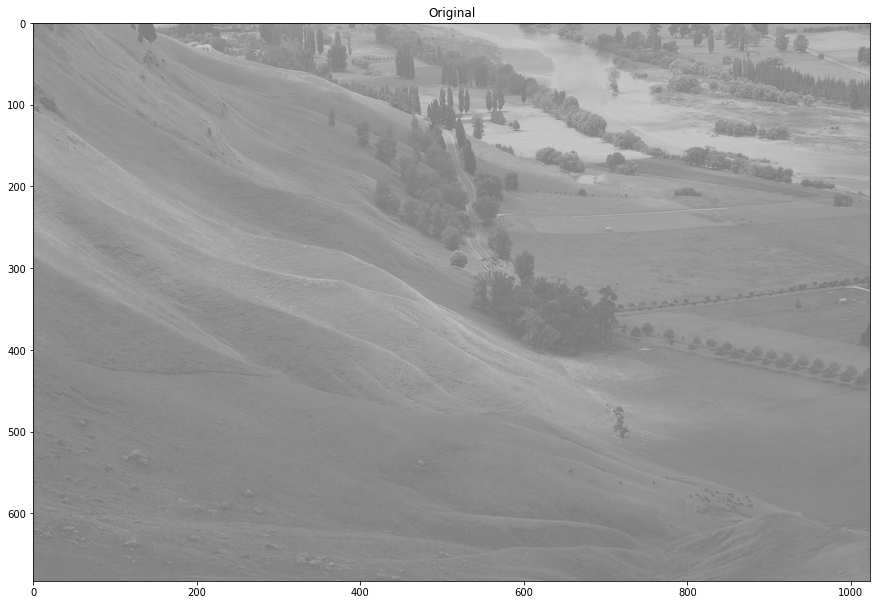

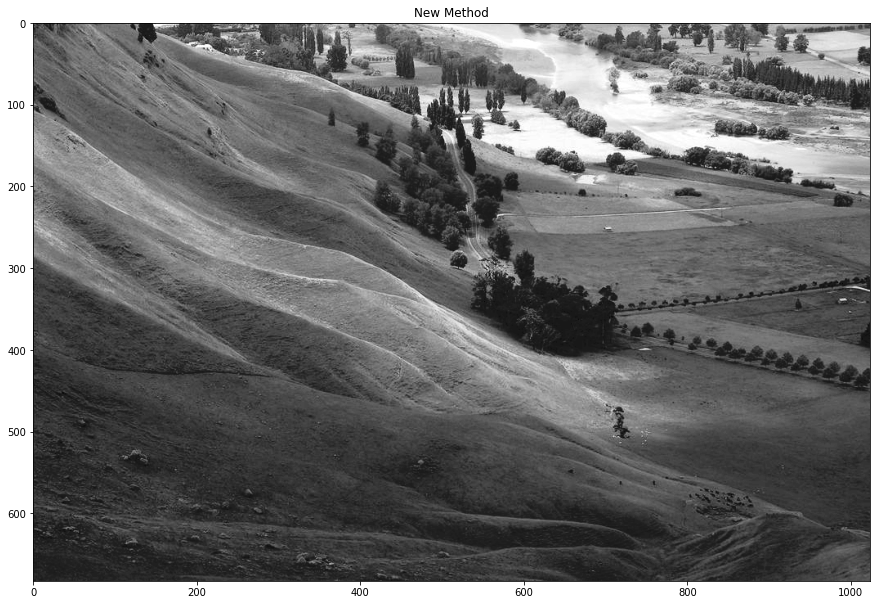

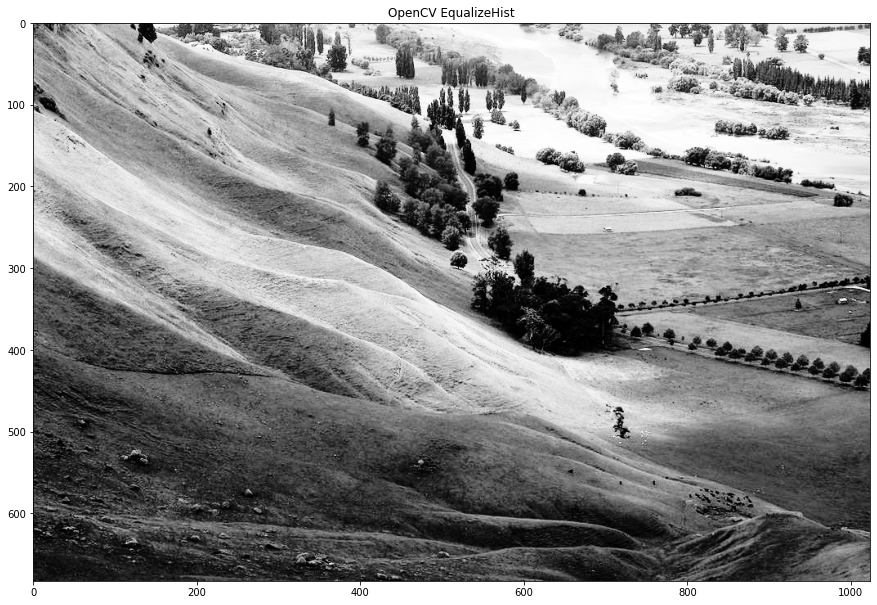

In [21]:
new_intensities = intensities[np.clip(np.concatenate((f_1, f_2, f_3, f_4)).round().astype('int'), 0, len(intensities) - 1)]
# new_intensities = np.concatenate((f_1, f_2, f_3, f_4)).round().astype('int')
print(new_intensities.max(), new_intensities.min())
new_intensities = np.uint8((new_intensities - new_intensities.min()) * 255.0/(new_intensities.max() - new_intensities.min()))
print(new_intensities.max(), new_intensities.min())
print(intensities.shape, new_intensities.shape)
mapper_dict = {key: value
               for key, value in zip(intensities, new_intensities)}


def mp(entry):
    return mapper_dict[entry] if entry in mapper_dict else entry


mp = np.vectorize(mp)

plt.figure(figsize=(15, 15))
plt.title("Original")
plt.imshow(bw_image, cmap='gray', vmin=0, vmax=255)

mapped_img = mp(bw_image.copy())
plt.figure(figsize=(15, 15))
plt.title("New Method")
plt.imshow(mapped_img, cmap='gray', vmin=0, vmax=255)

eq_hist = cv2.equalizeHist(bw_image.copy())
plt.figure(figsize=(15, 15))
plt.title("OpenCV EqualizeHist")
plt.imshow(eq_hist, vmin=0, vmax=256, cmap='gray')
plt.show()

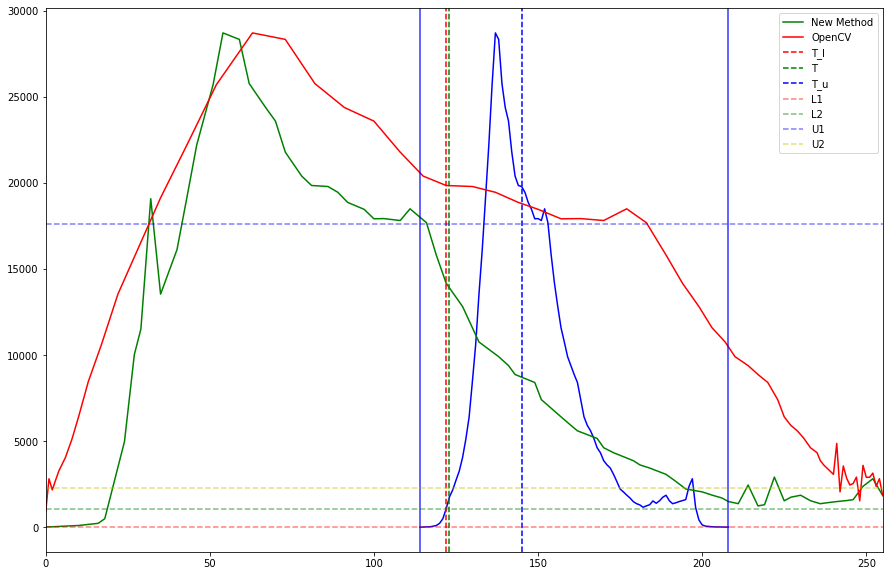

In [22]:
mapped_intensities, mapped_counts = np.unique(mapped_img, return_counts=True)
opencv_intensities, opencv_counts = np.unique(eq_hist, return_counts=True)

fig = plt.figure(figsize=(15, 10))
plt.plot(intensities, counts, c='b')
plt.plot(mapped_intensities, mapped_counts, c='g', label='New Method')
plt.plot(opencv_intensities, opencv_counts, c='r', label='OpenCV')
plt.xlim(0, 255)

plt.axvline(intensities[T_l], c='red', linestyle='--', label='T_l')
plt.axvline(intensities[T], c='green', linestyle='--', label='T')
plt.axvline(intensities[T_u], c='blue', linestyle='--', label='T_u')

plt.axvline(intensities[0], linestyle='-', alpha=0.8, c='blue')
plt.axvline(intensities[L-1], linestyle='-', alpha=0.8, c='blue')

plt.axhline(y=T_L1, color='r', linestyle='--', alpha=0.5, label='L1')
plt.axhline(y=T_L2, color='g', linestyle='--', alpha=0.5, label='L2')
plt.axhline(y=T_U1, color='b', linestyle='--', alpha=0.5, label='U1')
plt.axhline(y=T_U2, color='y', linestyle='--', alpha=0.5, label='U2')

plt.legend()

In [23]:
from Improved_Equalization import equalize_image, numba_equalize_image

In [24]:
%%timeit
hist_img = equalize_image(bw_image)

1.23 s ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


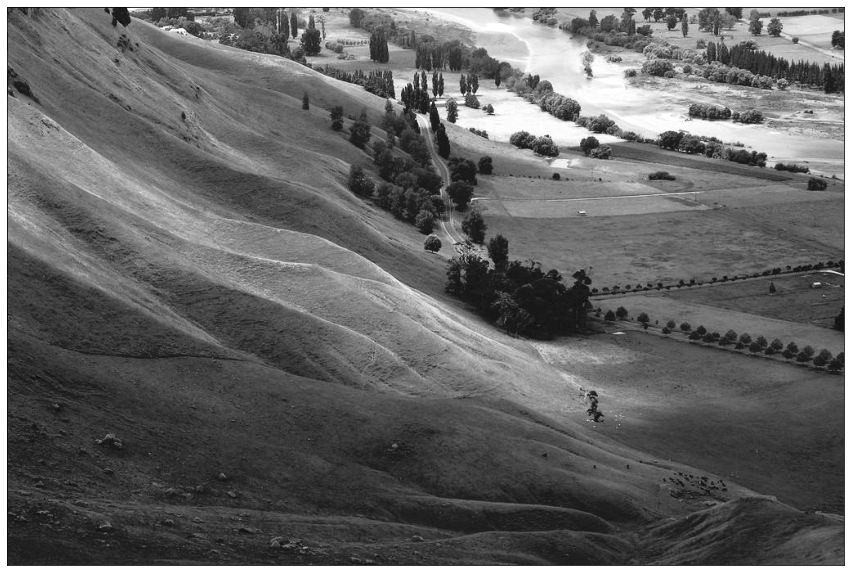

In [26]:
plot_image(equalize_image(bw_image))